# Custom indicator example

In [1]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass


In [2]:
ticker = 'AAPL'
prices = yf.Ticker(ticker).history('5y')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-14 00:00:00-05:00,46.526828,46.666001,44.614405,44.823166,243204000,0.00,0.0
2018-11-15 00:00:00-05:00,45.204697,46.063729,44.847166,45.929356,185915200,0.00,0.0
2018-11-16 00:00:00-05:00,45.710989,46.783578,45.461440,46.438046,147713200,0.00,0.0
2018-11-19 00:00:00-05:00,45.591011,45.758977,44.388849,44.597607,167701200,0.00,0.0
2018-11-20 00:00:00-05:00,42.800361,43.544216,42.114097,42.466827,271300800,0.00,0.0
...,...,...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,0.00,0.0
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,0.00,0.0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,0.00,0.0


In [3]:

@dataclass
class DEMA:
    """ Double Exponential Moving Average """
    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [4]:
res = DEMA(20)(prices)
res.tail()


Date
2023-11-07 00:00:00-05:00    175.097733
2023-11-08 00:00:00-05:00    176.472450
2023-11-09 00:00:00-05:00    177.566850
2023-11-10 00:00:00-05:00    179.271818
2023-11-13 00:00:00-05:00    180.441902
Name: close, dtype: float64

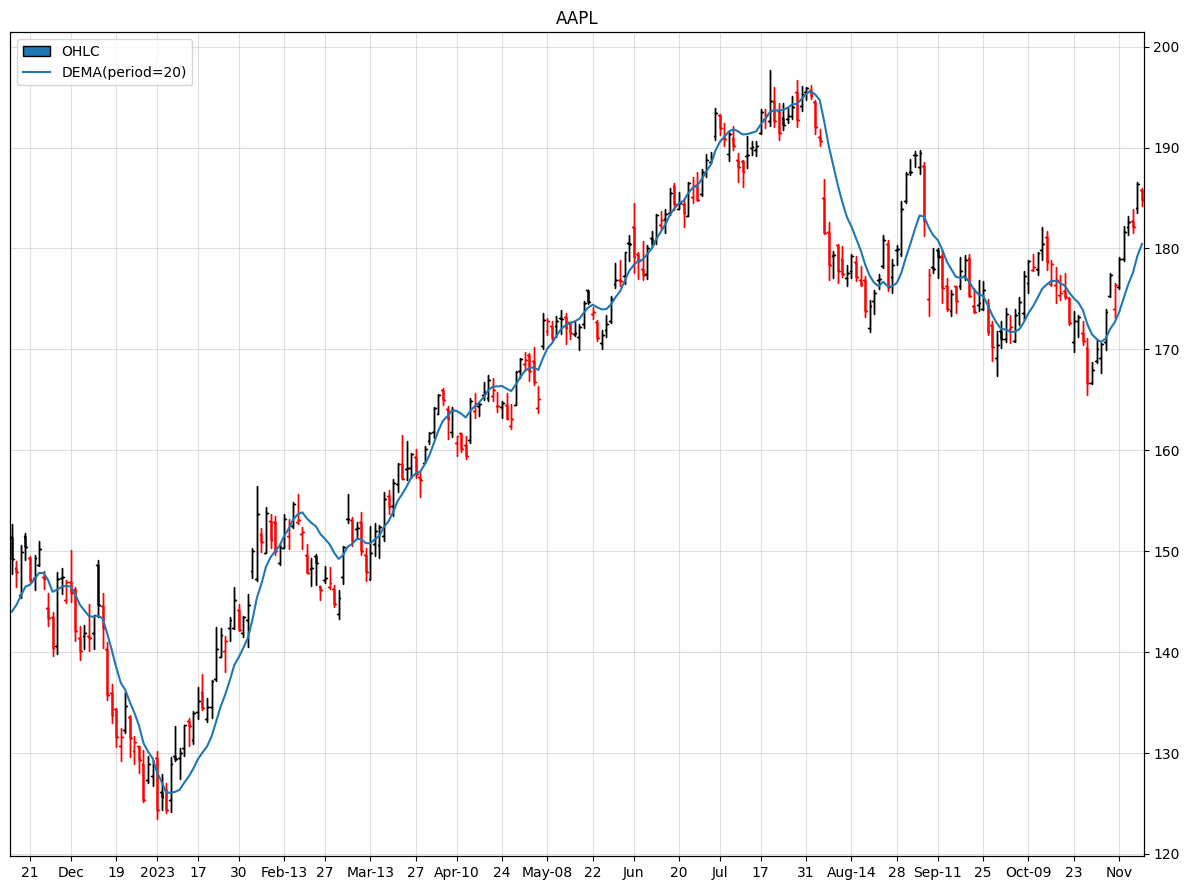

In [5]:
max_bars = 250

indicators = [
    OHLC(), DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
